In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set()
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('data/cycles-with-features.csv', header=0).drop(labels='Unnamed: 0', axis=1).drop([1])

### Normalize periodicity
Cycle analysis is easier when the number of points comprising each cycle is fixed. We fill each cycle with $0$ values if necessary.

In [7]:
import math

In [ ]:
# TODO
max_period = math.ceil(df['Period'].max()) # Evaluates to 536.3s -> 537s
ndf = df
for (ind, row) in df[df['Min']==1].iterrows():
    rows_to_pad = int((max_period - row['Period'])/0.1)
    val_to_pad = df[df['Cycle']==row['Cycle']].iloc[-1]['Load'] # Last 'Load' value in the cycle.
    last_ind = df[df['Cycle']==row['Cycle']].iloc[-1].index
    idf = 
    ndf = pd.concat(ndf.iloc[:last_ind], idf, ndf.iloc[last_ind+1:]).reset_index(drop=True)

#for cycle in range(df['Cycle'].max()):
#    df = pd.concat(df.iloc[])

### Autocorrelation
__Autocorrelation__ measures how similar cycles look over time. By observing the correlation of cycles for $n$-many lags, where _lag_ refers to how many previous data we choose to observe, we can measure randomness in cycles.

In [8]:
from pandas.plotting import autocorrelation_plot
import itertools

#### About the graph
Horizontal lines correspond to $95\%$ and $99\%$ confidence bands; i.e. autocorrelation $\approx 0.55$ for $99\%$ of cycle samples with lag$=1$.

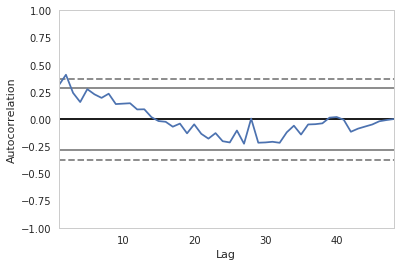

In [9]:
autocorrelation_plot(df[df['Min']==1]['Load'])

In [10]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
mean_period = math.ceil(df[df['Min']==1].Period.mean())
seasonal_pdq = [(x[0], x[1], x[2], mean_period) for x in list(itertools.product(p, d, q))]

### Grid-search for optimal _SARIMAX_ $p, d, q$

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
y = df[['Datetime', 'Load']].set_index('Datetime').drop(True)
y['Load'] += 1
y = y[::100]

reg = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,500),enforce_stationary=False, enforce_invertibility=False)
reg.fit()
#for param in pdq:
#    for c_param in seasonal_pdq:
        #try:
#            reg = SARIMAX(y, order=param, seasonal_order=c_param, enforce_stationarity=False, enforce_invertibility=False)
#            results = reg.fit()
#            print(param, c_param, results.aic)
        #except:
            #print('fail')
            #continue

ValueError: maxlag should be < nobs

In [ ]:
y

# Attempt SARIMAX on $CO_2$ dataset

In [16]:
import statsmodels.api as sm

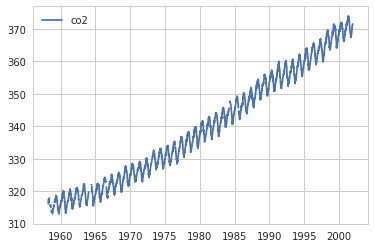

In [57]:
df = y = sm.datasets.co2.load_pandas().data
df.plot()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


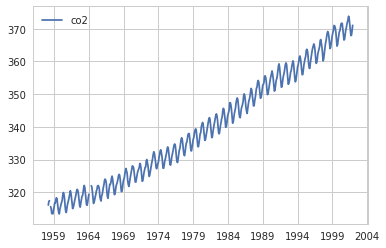

In [58]:
df.resample('MS').plot()

In [38]:
y = sm.datasets.co2.load_pandas().data
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
#y.rename(columns={0:'Time', 1:'Load'}, inplace=True)

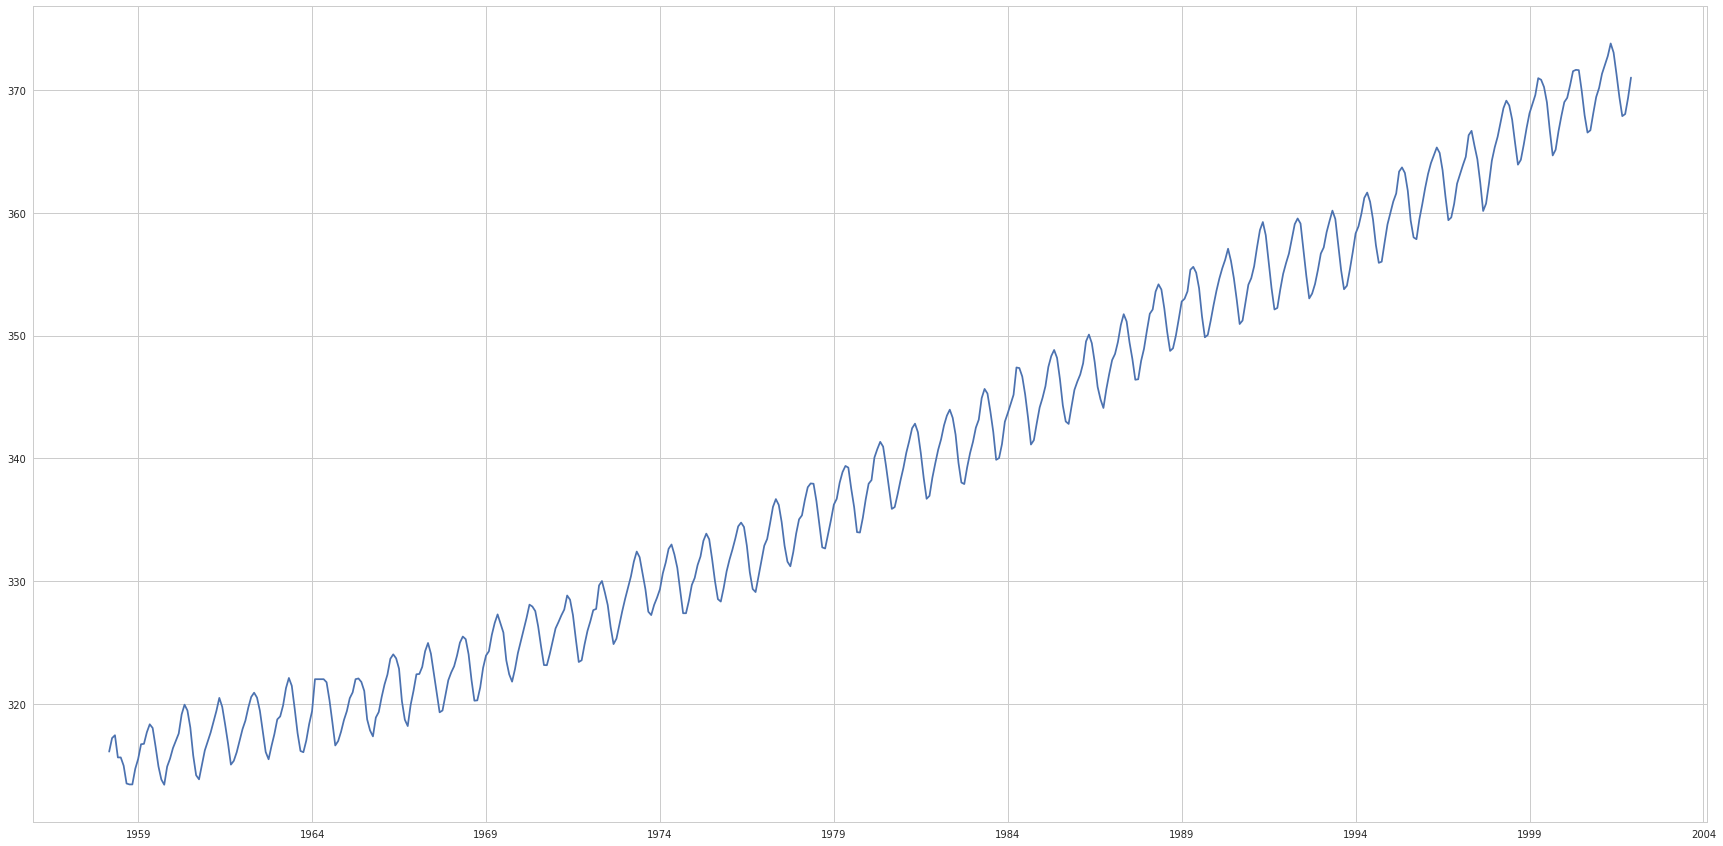

In [41]:
y.plot(figsize=(30,15))

In [42]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [61]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [60]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ValueError: Start must be in dates. Got 1998-01-01 00:00:00 | 1998-01-01 00:00:00

In [ ]:
ax = y['1990':].plot(figsize=(30,15))
pred.predicted_mean.plot(ax=ax, alpha=.8)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.5)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.show()

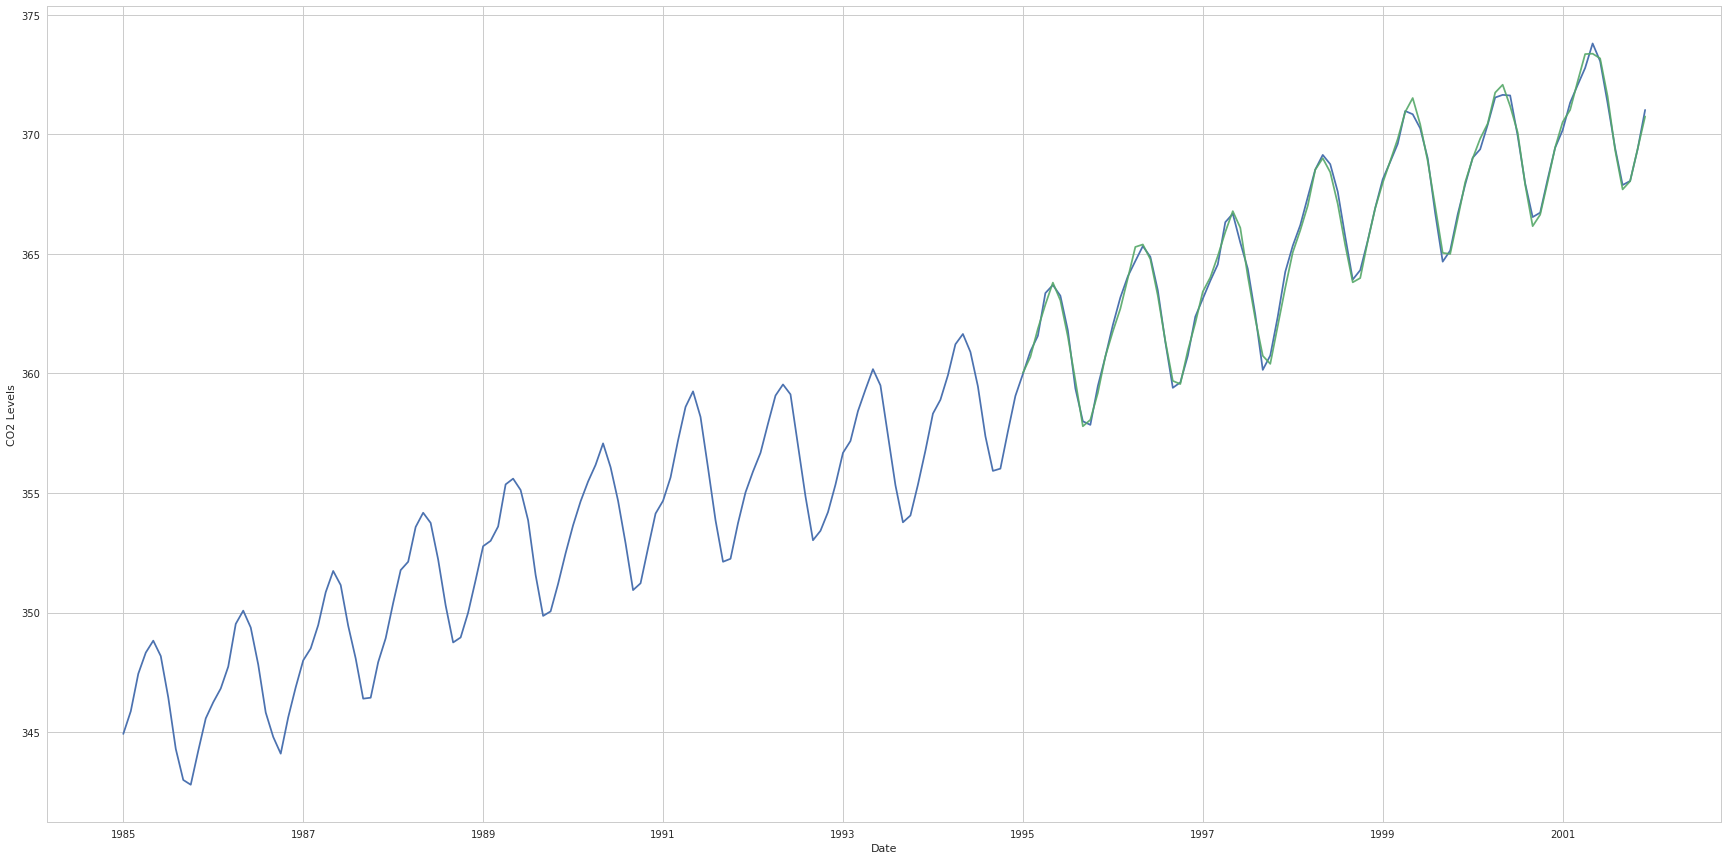

In [54]:
pred = results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['1985':].plot(figsize=(30,15))
pred.predicted_mean.plot(ax=ax, alpha=.9)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.show()